<a href="https://colab.research.google.com/github/BrunoShinniti/Estatistica_com_Python/blob/main/Alura_Estatistica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
 dados = pd.read_csv('dados.csv')
 dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [3]:
type(dados)

pandas.core.frame.DataFrame

In [4]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [5]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

In [6]:
print('De {} ate {} anos.'.format(dados.Idade.min(), dados.Idade.max()))

De 13 ate 99 anos.


In [7]:
print('De {:.2f} ate {:.2f} metros.'.format(dados.Altura.min(), dados.Altura.max()))

De 1.34 ate 2.03 metros.


**Distribuicao de frequencias para variaveis QUALITATIVAS**

*Metodo 1:*

In [8]:
sexo = dados.Sexo.value_counts()
psexo = (dados.Sexo.value_counts(normalize=True)*100).round(2)

In [9]:
dist_freq_qualitativas = pd.DataFrame({'Frequencia': sexo, 'Porcentagem (%)': psexo})
dist_freq_qualitativas

,Frequencia,Porcentagem (%)
0,53250,69.3
1,23590,30.7


In [10]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)

In [11]:
dist_freq_qualitativas

Sexo,Frequencia,Porcentagem (%)
Masculino,53250,69.3
Feminino,23590,30.7


*Metodo 2:*

In [12]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indigena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaracao'}

In [13]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)

frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

In [14]:
frequencia

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [15]:
percentual = (pd.crosstab(dados.Sexo, dados.Cor, normalize = True) *100).round(2)

percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)

In [16]:
percentual

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


In [17]:
media = (pd.crosstab(dados.Sexo, dados.Cor, aggfunc = 'mean', values = dados.Renda)).round(2)

media.rename(index = sexo, inplace = True)
media.rename(columns = cor, inplace = True)

In [18]:
media

Cor,Indigena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


**Distribuicao de frequencias para variaveis QUANTITATIVAS**

Dados 2015<p>
Salario Minimo = R$ 788,00<p>
<p>
Classe A -> Acima de 20 SM<p>
Classe B -> de 10 a 20 SM<p>
Classe C -> de 4 a 10 SM<p>
Classe D -> de 2 a 4 SM<p>
Classe E -> ate 2 SM

In [19]:
dados.Renda.min()

0

In [20]:
dados.Renda.max()

200000

In [21]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [22]:
labels = ['E', 'D', 'C', 'B', 'A']

In [23]:
pd.value_counts(
  pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [24]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True))

In [25]:
percentual = (pd.value_counts(
  pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True)*100).round(2)

In [26]:
dist_freq_quantitativa = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativa.sort_index(ascending=False)

,Frequencia,Porcentagem (%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


***Regra de Sturges***<p>
Da uma quantidade de classes a ser trabalhada para uma boa forma de visualizar baseado na quantidade de dados no banco.
*texto em itálico*

In [27]:
n = dados.shape[0]
n

76840

In [28]:
k = 1 + (10 / 3) * np.log10(n)
k = int(k.round(0))
k

17

In [29]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ), sort = False
)

In [30]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ), sort = False,
      normalize = True
)

In [31]:
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [32]:
dist_freq_quantitativa_amplitude_fixa = pd.DataFrame({'Frequencia': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativa_amplitude_fixa

,Frequencia,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


**Histograma**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


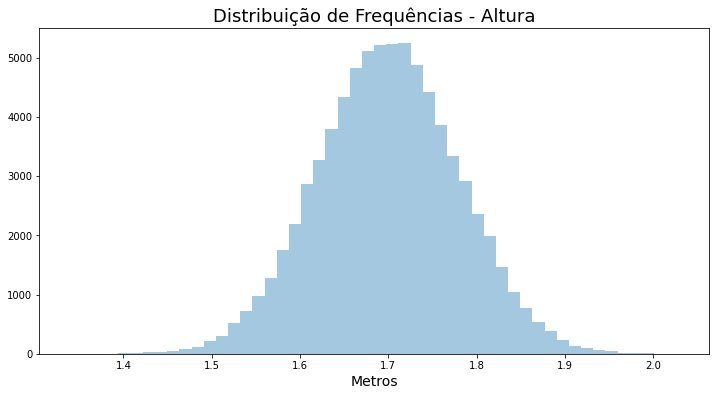

In [33]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


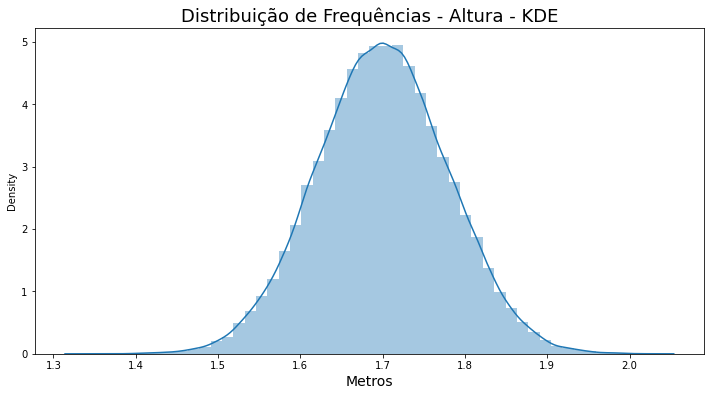

In [34]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

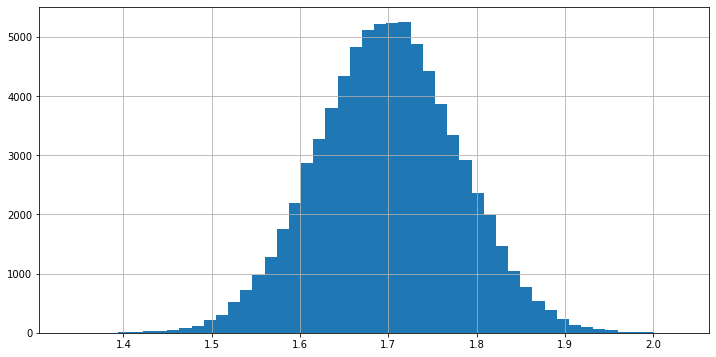

In [35]:
dados.Altura.hist(bins = 50, figsize = (12, 6))

In [36]:
dist_freq_quantitativa

,Frequencia,Porcentagem (%)
E,49755,64.75
D,16700,21.73
C,7599,9.89
B,2178,2.83
A,608,0.79


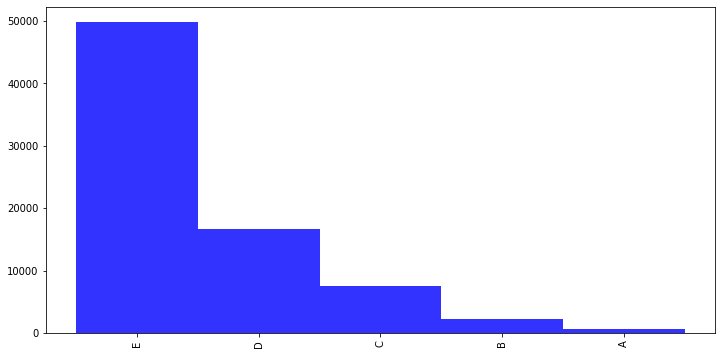

In [37]:
dist_freq_quantitativa['Frequencia'].plot.bar(width = 1, color = 'blue', alpha = .8, figsize = (12, 6))

MEDIDAS DE TENDENCIA CENTRAL

In [38]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


**Media**

In [39]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7 #Fulano

7.714285714285714

In [40]:
df['Fulano'].mean()

7.714285714285714

In [41]:
dados.Renda.mean()

2000.3831988547631

In [42]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [43]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [44]:
dataset.Idade.mean()

46.1

In [45]:
dataset.groupby(['Sexo'])['Idade'].mean()

Sexo
H    45.750000
M    46.333333
Name: Idade, dtype: float64

_______________________________________________________________________________

Mediana

1 - Ordenar o conjunto de dados<p>
2 - Identificar o numero de observacoes (registros) do conjunto de dados<p>
3 - Identificar o elemento mediano

In [46]:
notas_fulano = df.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [47]:
notas_fulano =  notas_fulano.sort_values()
notas_fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [48]:
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [49]:
n = notas_fulano.shape[0]
n

7

In [50]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [51]:
notas_fulano.loc[elemento_md-1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [52]:
df.Fulano.median()

8.0

In [53]:
dados.Renda.median()

1200.0

In [54]:
dados.Renda.quantile()

1200.0

_________________________________________________________________________________________________

Moda<p>
o Valor mais frequente, podendo ter mais de 2 Moda (multimodal)

In [55]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [56]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])

In [57]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

In [58]:
dados.Renda.mode()

0    788
dtype: int64

In [59]:
dados.Altura.mode().round(2)

0    1.57
1    1.67
2    1.68
3    1.69
4    1.71
5    1.71
6    1.75
7    1.78
8    1.80
dtype: float64

Assimetrica Direita e Esquerda e Simetrica 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


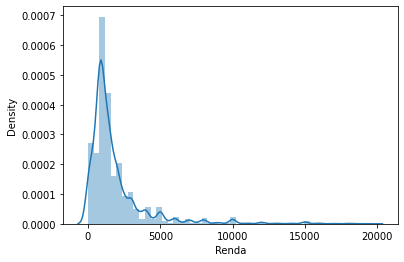

In [60]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax = sns.set(rc={'figure.figsize':(20,10)})
ax

In [61]:
moda = dados.Renda.mode()[0]
moda

788

In [62]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [63]:
Media = dados.Renda.mean()
Media

2000.3831988547631

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


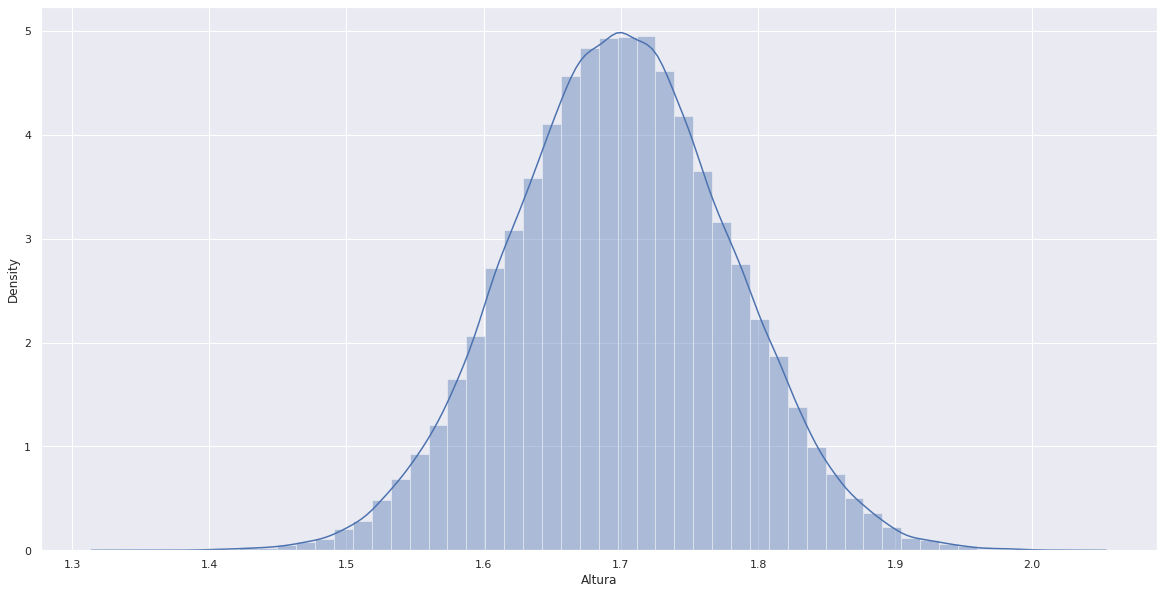

In [64]:
ax = sns.distplot(dados.Altura)
ax = sns.set(rc={'figure.figsize':(20,10)})
ax

In [65]:
Moda = dados.Altura.mode()
Mediana = dados.Altura.median()
Media = dados.Altura.mean()

In [66]:
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [67]:
Mediana

1.6993247325

In [68]:
Media

1.6995124540575814

________________________________________________________________________________________________

Medidas Separatrizes<p>
Quartis, decis e percentis

In [70]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [72]:
[i / 10 for i in range(1, 10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [79]:
dados.Renda.quantile([i / 100 for i in range(1, 101)])

0.01         0.0
0.02         0.0
0.03         0.0
0.04        50.0
0.05       100.0
          ...   
0.96      7000.0
0.97      8000.0
0.98     10000.0
0.99     15000.0
1.00    200000.0
Name: Renda, Length: 100, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

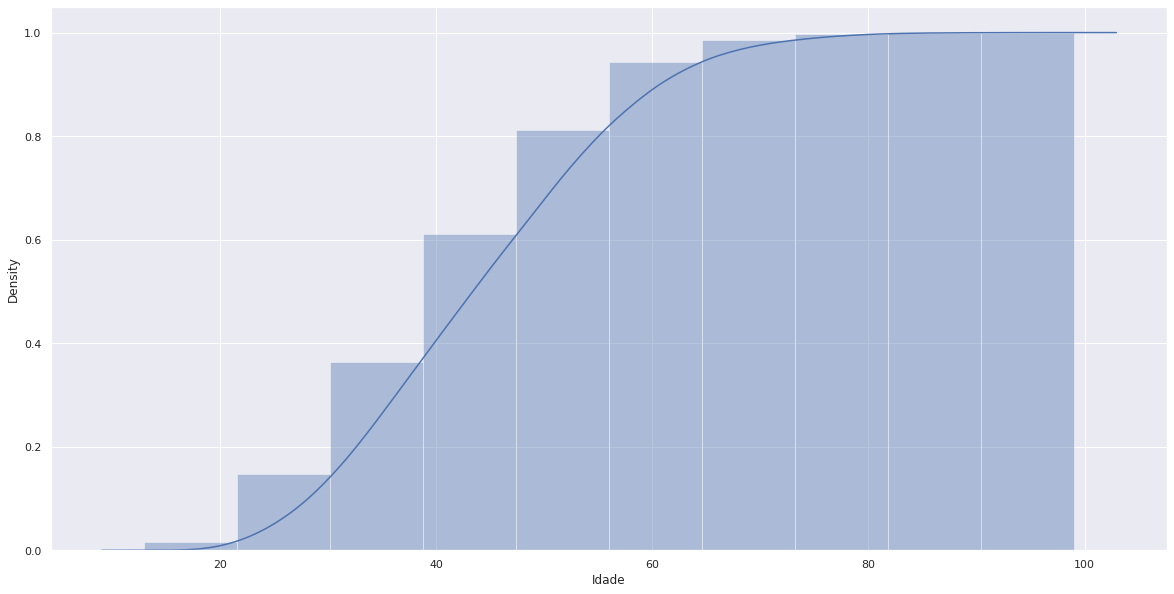

In [82]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax = figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [81]:
dados.Idade.quantile([i / 100 for i in range(1, 101)])

0.01    21.0
0.02    22.0
0.03    23.0
0.04    24.0
0.05    25.0
        ... 
0.96    67.0
0.97    69.0
0.98    71.0
0.99    75.0
1.00    99.0
Name: Idade, Length: 100, dtype: float64

NameError: ignored

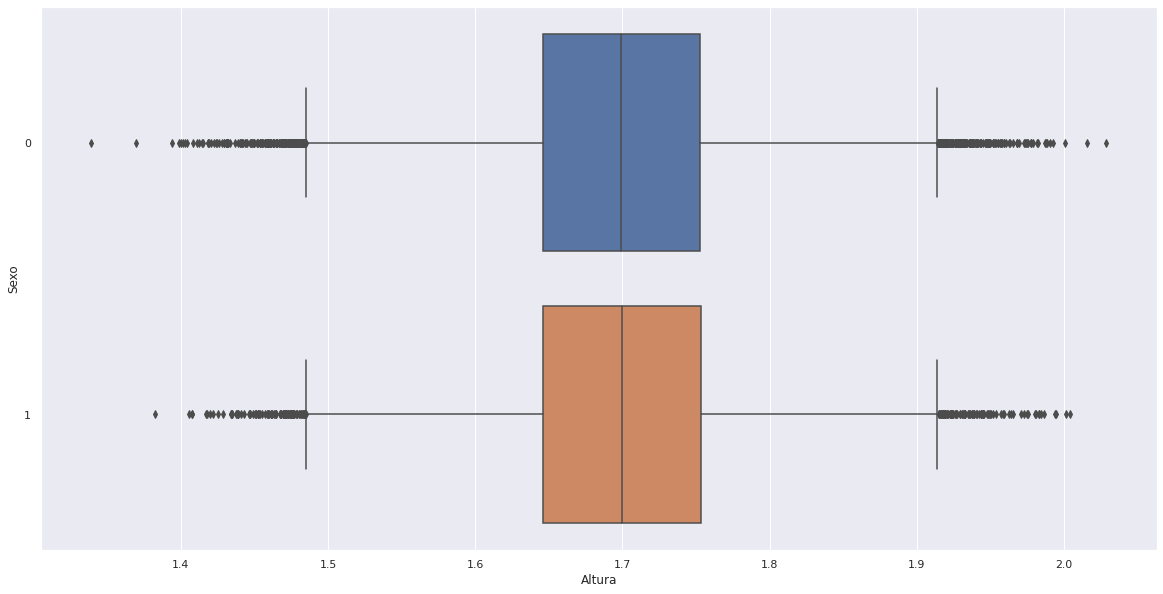

In [84]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax = figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

NameError: ignored

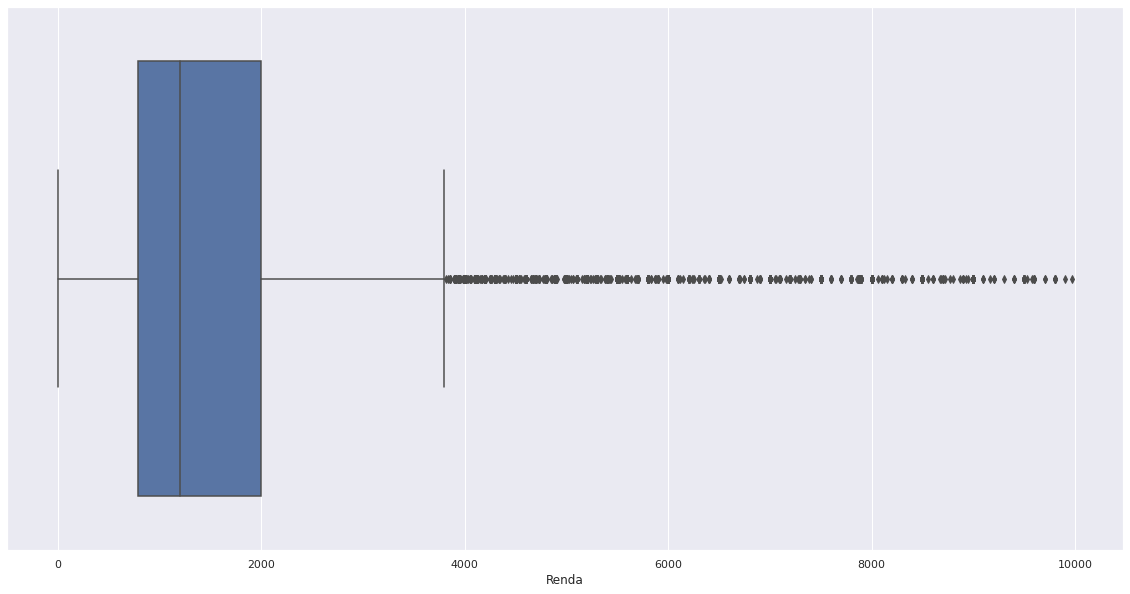

In [86]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda < 10000'), orient = 'h')
ax = figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

NameError: ignored

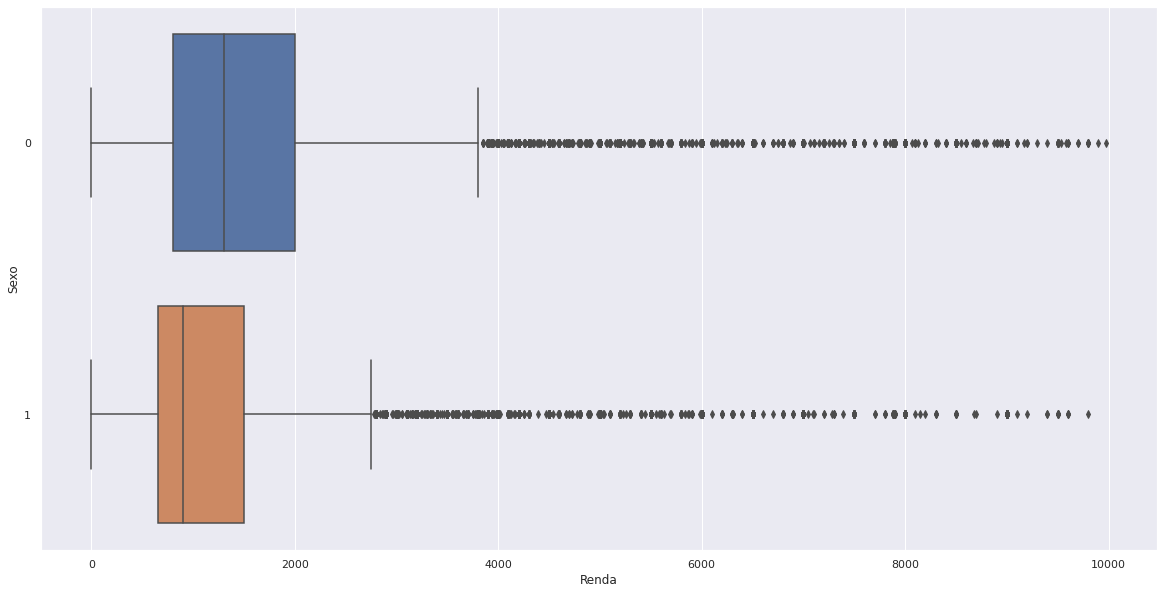

In [87]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax = figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

NameError: ignored

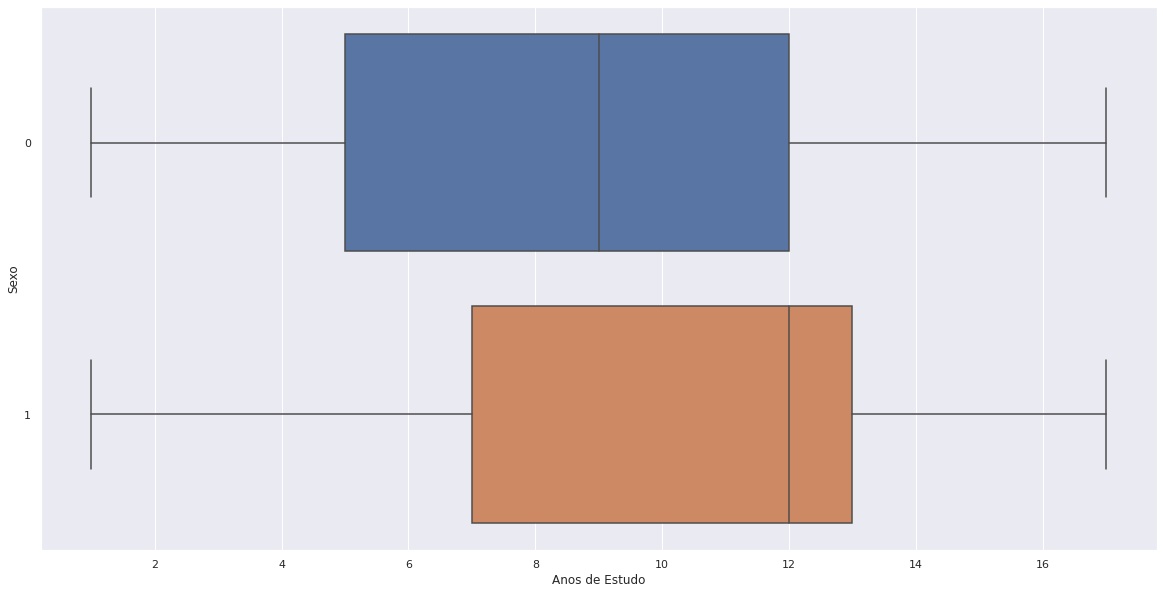

In [89]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')
ax = figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

***Medidas de dispersao***

In [91]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [92]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [94]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [96]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [97]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [98]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [100]:
 notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
 notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [102]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [103]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

In [105]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [106]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano)-1)

4.57142857142857

In [108]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

Desvio Padrao

In [109]:
np.sqrt(variancia)

2.1380899352993947

In [110]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [111]:
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [112]:
df.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [113]:
df.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [114]:
df.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [115]:
df.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64

Exercicio

In [116]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})
dataset

,Sexo,Idade
0,H,53
1,M,72
2,M,54
3,M,27
4,M,30
5,H,40
6,H,58
7,H,32
8,M,44
9,M,51


In [117]:
dataset.groupby(['Sexo'])['Idade'].std()[1]

16.645319662495723

In [118]:
dataset.groupby(['Sexo'])['Idade'].std().loc['M']

16.645319662495723

__________________________